<a href="https://colab.research.google.com/github/nrmlptr/Latihan-ML/blob/main/Latihan7_SKlearn_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tujuan dari latihan ini untuk belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

In [1]:
import pandas as pd

# ubah file csv menjadi dataframe
df = pd.read_csv('sample_data/Mall_Customers.csv')
# tampilkan 3 baris pertama data
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Kemudian lakukan sedikit preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik.

In [3]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
               'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})

# ubah data kategorikal menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preproccess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


selanjutnya impor K-Means, lalu hilangkan kolom Customer ID dan gender karena tidak diperlukan untuk proses clustering. setelah itu tentukan nilai K yang optimal dengan metode Elbow. pada libary K-Means di SKLearn sudah disediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah tertentu. sehingga disini akan dibuat list yang berisi inersia dari nilai K antara 1 - 11.

In [5]:
from sklearn.cluster import KMeans

# menghilangkan kolom Customer ID dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# baut list yang berisi inersia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

setelah dijalankan dapat diketahui bahwa elbow berada di nilai K sama dengan 5, sehingga penurunan inersia tidak lagi signifikan setelah nilai K = 5.

Text(0, 0.5, 'Inertia')

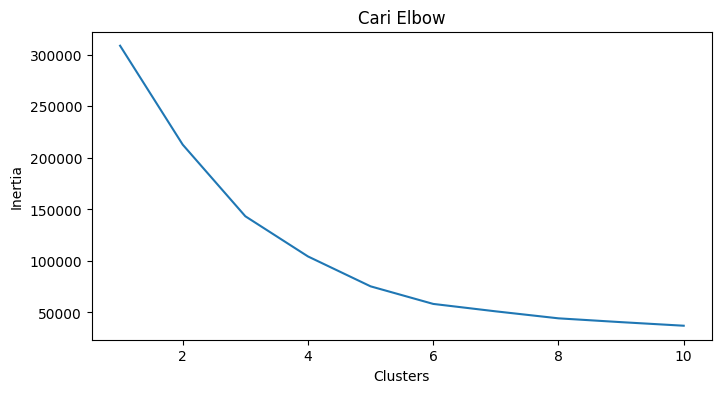

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

yang terakhir, coba latih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. lalu buat plot hasil pengklasteran KMeans.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


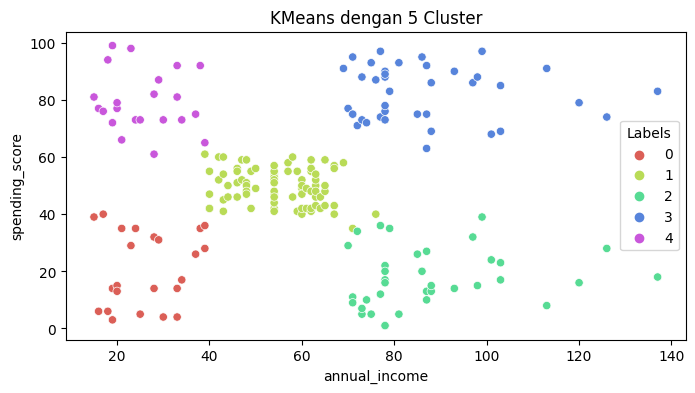

In [8]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# tambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# buat plot KMeans dengan 5 kluster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()